In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
np.random.seed(0)

In [75]:
dogs_whisker_length = np.random.normal(loc=5,scale=4,size=20)
dogs_ear_flappiness_index = np.random.normal(loc=8,scale=4,size=20)

In [76]:
cats_whisker_length = np.random.normal(loc=8,scale=4,size=20)
cats_ear_flappiness_index = np.random.normal(loc=5,scale=4,size=20)

In [77]:
cats_ear_flappiness_index

array([ 2.31015821,  3.56178735,  1.74741487, -1.90513041,  5.70970457,
        3.39287626, -1.52079339,  6.85112902,  1.37080654,  5.20778158,
        7.91636225,  5.51593164,  9.55760274,  0.06069672,  6.60936656,
        2.26075964,  1.5168114 ,  2.68460134,  3.75378987,  5.22466137])

In [79]:
dogs_whisker_length

array([12.05620938,  6.60062883,  8.91495194, 13.9635728 , 12.47023196,
        1.09088848,  8.80035367,  4.39457117,  4.58712459,  6.64239401,
        5.57617428, 10.81709403,  8.0441509 ,  5.48670007,  6.77545293,
        6.33469731, 10.97631629,  4.17936694,  6.25227081,  1.58361704])

In [80]:
cats_whisker_length

array([ 3.80578814,  2.31992825,  1.17491924, 15.80310158,  5.96139127,
        6.24770279,  2.98881856, 11.10996142,  1.54440861,  7.14903888,
        4.41813376,  9.54760999,  5.95677945,  3.27747126,  7.88727109,
        9.71332748,  8.26606889,  9.20988759,  5.46271163,  6.54903534])

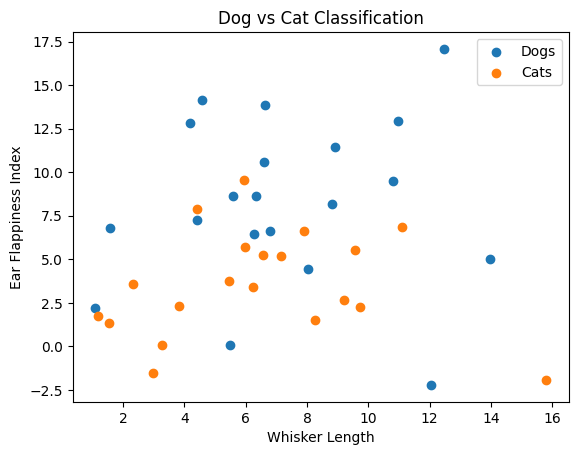

In [81]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show()

In [83]:
def random_linear_classifier(data_dogs, data_cats, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    
    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        
        error = compute_error(data_dogs, data_cats, theta, theta0)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta, best_theta0

In [84]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error 

In [85]:
dogs_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T

In [86]:
dogs_data


array([[12.05620938, -2.21195926],
       [ 6.60062883, 10.61447438],
       [ 8.91495194, 11.4577448 ],
       [13.9635728 ,  5.03133992],
       [12.47023196, 17.0790185 ],
       [ 1.09088848,  2.1825373 ],
       [ 8.80035367,  8.18303407],
       [ 4.39457117,  7.2512646 ],
       [ 4.58712459, 14.13111686],
       [ 6.64239401, 13.87743508],
       [ 5.57617428,  8.6197897 ],
       [10.81709403,  9.51265008],
       [ 8.0441509 ,  4.44885701],
       [ 5.48670007,  0.07681413],
       [ 6.77545293,  6.6083514 ],
       [ 6.33469731,  8.62539588],
       [10.97631629, 12.92116272],
       [ 4.17936694, 12.8095194 ],
       [ 6.25227081,  6.45069273],
       [ 1.58361704,  6.790789  ]])

In [67]:
cats_data

array([[ 3.80578814,  2.31015821],
       [ 2.31992825,  3.56178735],
       [ 1.17491924,  1.74741487],
       [15.80310158, -1.90513041],
       [ 5.96139127,  5.70970457],
       [ 6.24770279,  3.39287626],
       [ 2.98881856, -1.52079339],
       [11.10996142,  6.85112902],
       [ 1.54440861,  1.37080654],
       [ 7.14903888,  5.20778158],
       [ 4.41813376,  7.91636225],
       [ 9.54760999,  5.51593164],
       [ 5.95677945,  9.55760274],
       [ 3.27747126,  0.06069672],
       [ 7.88727109,  6.60936656],
       [ 9.71332748,  2.26075964],
       [ 8.26606889,  1.5168114 ],
       [ 9.20988759,  2.68460134],
       [ 5.46271163,  3.75378987],
       [ 6.54903534,  5.22466137]])

In [98]:
k = 2000
d = 2
best_theta,best_theta0 = random_linear_classifier(dogs_data,cats_data,k,d)

In [100]:
best_theta

array([-0.15958309,  0.32534185])

In [101]:
best_theta0

-0.9514853826623146

In [102]:
x_vals = np.linspace(-6, 15, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])

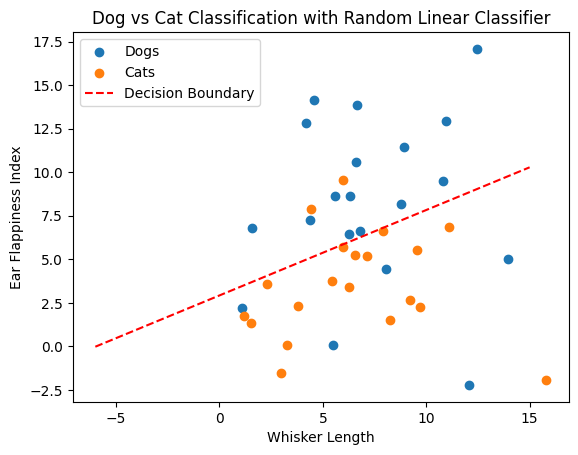

In [103]:

plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()